In [1]:
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
df1 = pd.read_csv('01_April_30_covid_impact_survey.csv')
df2 = pd.read_csv('02_May_12_covid_impact_survey.csv')
df3 = pd.read_csv('03_June_9_covid_impact_survey.csv')

/Users/jingyilu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (96,156,168,170) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/jingyilu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (172) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
def draw_pie(data, col_1, col_2):
    # col_1 is the key, e.g. age, 
    labels = data[col_1].drop_duplicates().to_list()
    for label in labels:
        counts = data[col_2][data[col_1] == label].value_counts()
        counts = counts.sort_index()
        y = list(map(lambda x: x[:25], counts.keys().to_list()))
        x = counts.to_list()
        explode = [0.05] * len(x)
        plot.pie(x, explode=explode, labels=y, shadow=True, autopct='%.1f%%', pctdistance=0.7)
        plot.title(col_2+' distribution where '+ col_1 + ' is ' + label)
        plot.show()


In [4]:
df = pd.concat([df1, df2, df3])
df = df[df['ECON1'] != '(98) SKIPPED ON WEB']
df = df[df['ECON1'] != "(77) DON'T KNOW"]
df = df[df['ECON1'] != "(99) REFUSED"]
df = df.replace(["(1) Yes, I worked for someone else for wages, salary, piece rate, commission, tips, or payments 'in kind,' for example, food or lodging received as payment for work performed"], 'Employed')
df = df.replace(["(2) Yes, I worked as self-employed in my own business, professional practice, or farm"], 'Self-employed')
df = df.replace(["(3) No, I did not work for pay last week."], 'Unemployed')
df = df[df['AGE4'] != '(4) 60+']
df = df.sort_values('ECON1')

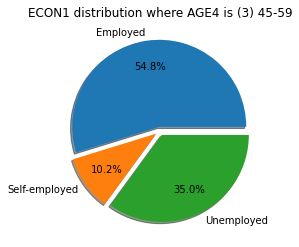

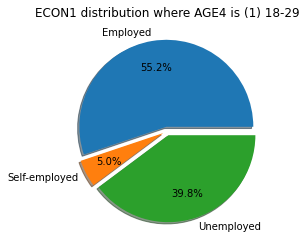

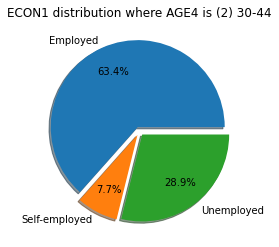

In [5]:
df_age = df[df['AGE4'] != '(4) 60+']
df_age = df_age[df_age['AGE4'] != '(88) Removed for disclosure risk']
draw_pie(df_age, 'AGE4', 'ECON1')

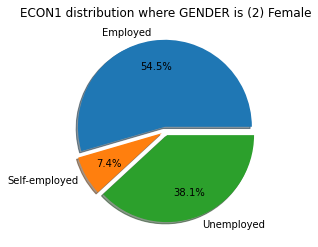

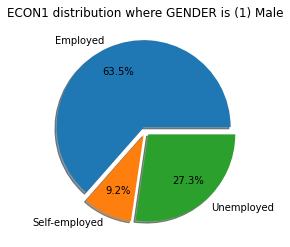

In [6]:
df_gender = df[df['GENDER'] != '(98) SKIPPED ON WEB']
df_gender = df_gender[df_gender['GENDER'] != '(99) REFUSED']
draw_pie(df_gender, 'GENDER', 'ECON1')

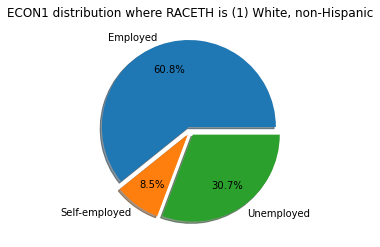

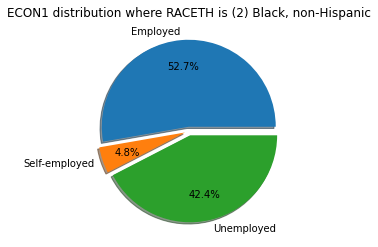

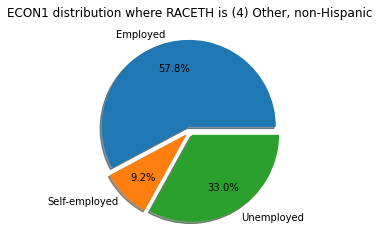

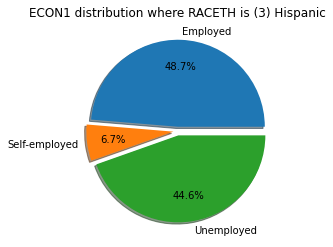

In [7]:
df_race = df[df['RACETH'] != '(98) SKIPPED ON WEB']
df_race = df_race[df_race['RACETH'] != '(88) Removed for disclosure risk']
df_race = df_race[df_race['RACETH'] != '(99) REFUSED']
df_race = df_race[df_race['RACETH'] != "(77) DON'T KNOW"]
draw_pie(df_race, 'RACETH', 'ECON1')